In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


In [ ]:
test = pd.read_csv('test.csv')
test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [ ]:
train = pd.read_csv('train.csv')
train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
train.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)
test.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)

In [ ]:
print(f"Number of rows in training data: {train.shape[0]}")
print(f"Number of rows in test data: {test.shape[0]}")

Number of rows in training data: 103904
Number of rows in test data: 25976


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [ ]:
train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
missing_values = []
columns = train.columns.to_list()
for column in columns:
    null_values = train[column].isnull().sum()
    missing_values.append([column, null_values])
pd.DataFrame(missing_values, columns=["Column Name", "Nombre des valeurs manquantes"]).set_index("Column Name").rename_axis(None)

,Nombre des valeurs manquantes
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [ ]:
missing_values = []
columns = test.columns.to_list()
for column in columns:
    null_values = test[column].isnull().sum()
    missing_values.append([column, null_values])
pd.DataFrame(missing_values, columns=["Column Name", "Nombre des valeurs manquantes"]).set_index("Column Name").rename_axis(None)

,Nombre des valeurs manquantes
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [ ]:
median_val = train['Arrival Delay in Minutes'].median()
# Filling missing values with median as distribution of arrival delay was heavily skewed
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].fillna(median_val)
test['Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].fillna(median_val)

In [ ]:
pd.set_option('display.max_colwidth', 0)

cat = []

for col_name in train.select_dtypes(include=['object']).columns:
    categories_list = train[col_name].value_counts().index.to_list()
    cat.append([col_name, categories_list])

cat_df = pd.DataFrame(cat, columns=["Column Name", "Classes"]).set_index("Column Name").rename_axis(None)

print(cat_df)

                                             Classes
Gender          [Female, Male]                      
Customer Type   [Loyal Customer, disloyal Customer] 
Type of Travel  [Business travel, Personal Travel]  
Class           [Business, Eco, Eco Plus]           
satisfaction    [neutral or dissatisfied, satisfied]


In [ ]:
cat_cols_temp = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
train[cat_cols_temp] = train[cat_cols_temp].astype(object)

In [ ]:
cat_columns = train.select_dtypes(object).columns.to_list()
print(cat_columns)
print()
num_columns = train.select_dtypes(np.number).columns.to_list()
print(num_columns)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']

['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


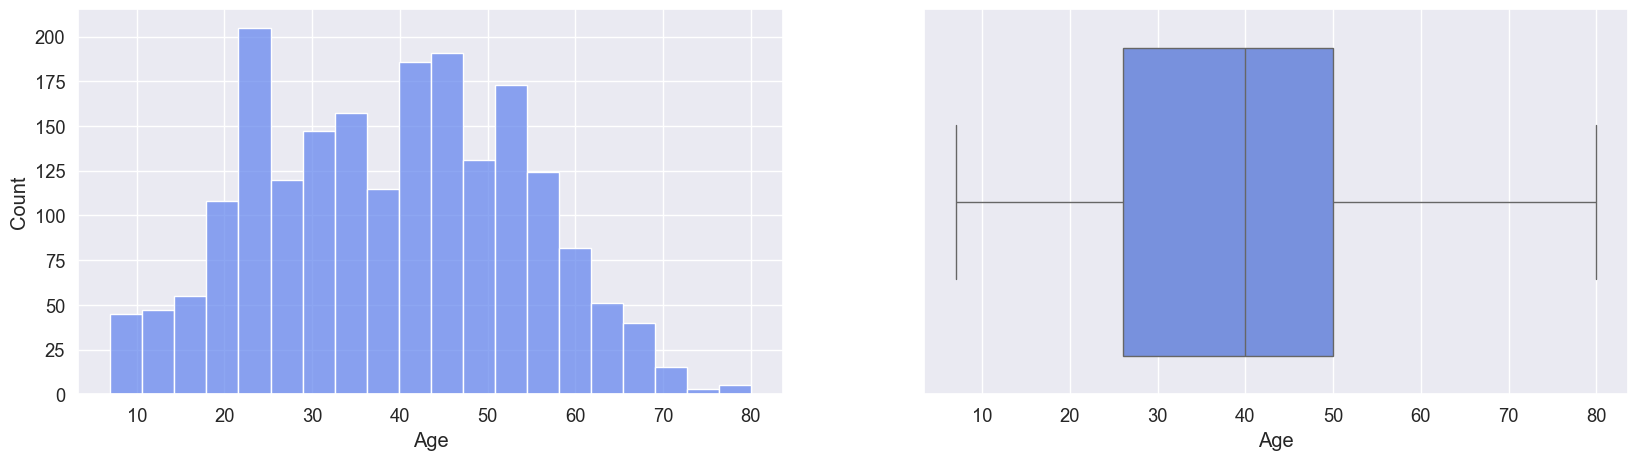

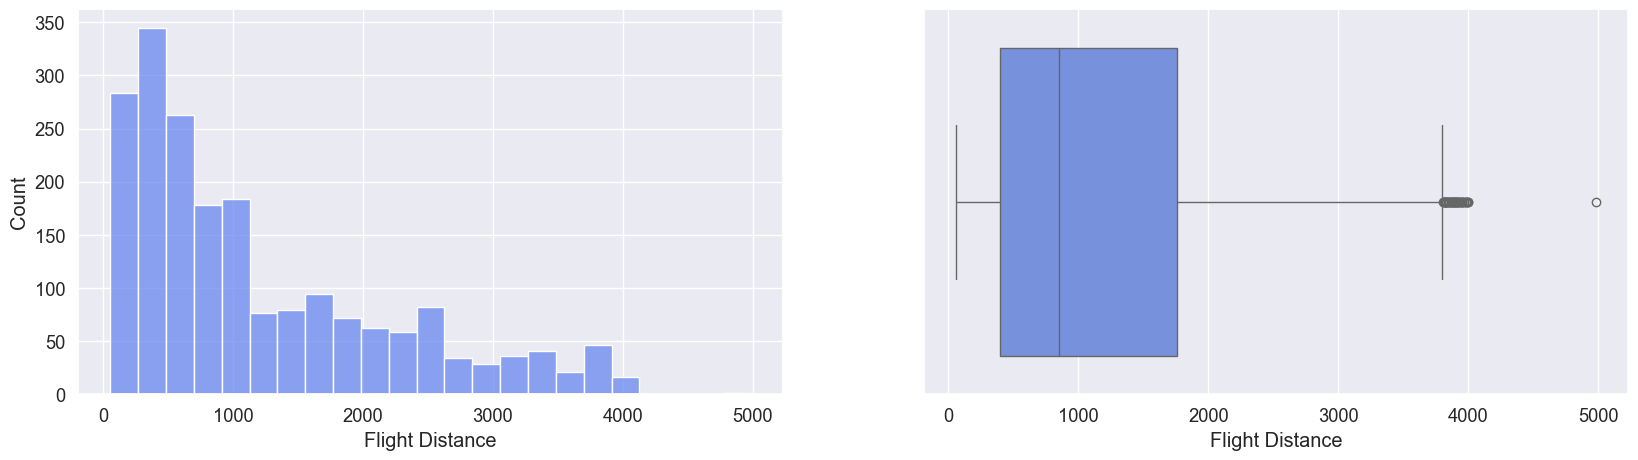

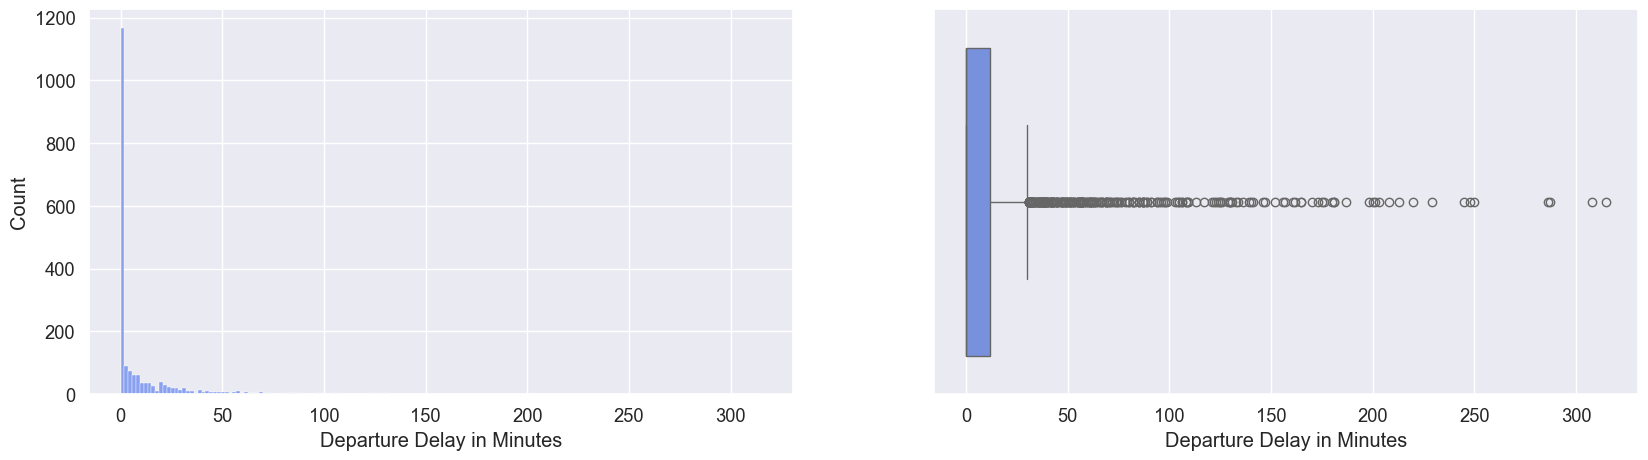

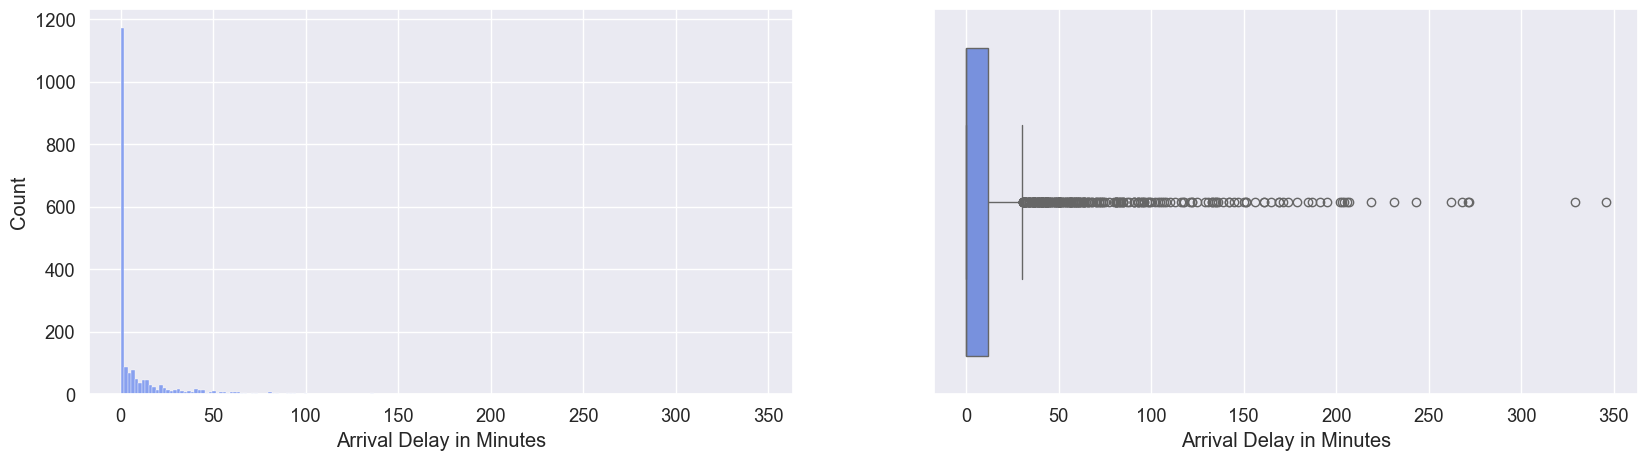

In [ ]:
sample_data = train.sample(2000)
sns.set_context('notebook', font_scale= 1.2)
sns.set_palette('coolwarm')
for col in num_columns:
    fig, ax = plt.subplots(1, 2, figsize = (20, 5))
    sns.histplot(sample_data[col], ax = ax[0])
    sns.boxplot(x = sample_data[col], ax= ax[1])

Majority of the flights have no delay, therefore both the Departure delay and arrival delay distributions are heavily skewed.
Majority of the flights have distance lesser than 1000 Km and only some have distance greater than 4000 Km

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5752\1976606479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender', data = sample_data, palette= 'coolwarm', ax = axes[0, 0]);
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5752\1976606479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Customer Type', data = sample_data, palette= 'coolwarm', ax = axes[0, 1]);
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5752\1976606479.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Type of Travel', data = sample_data, palette

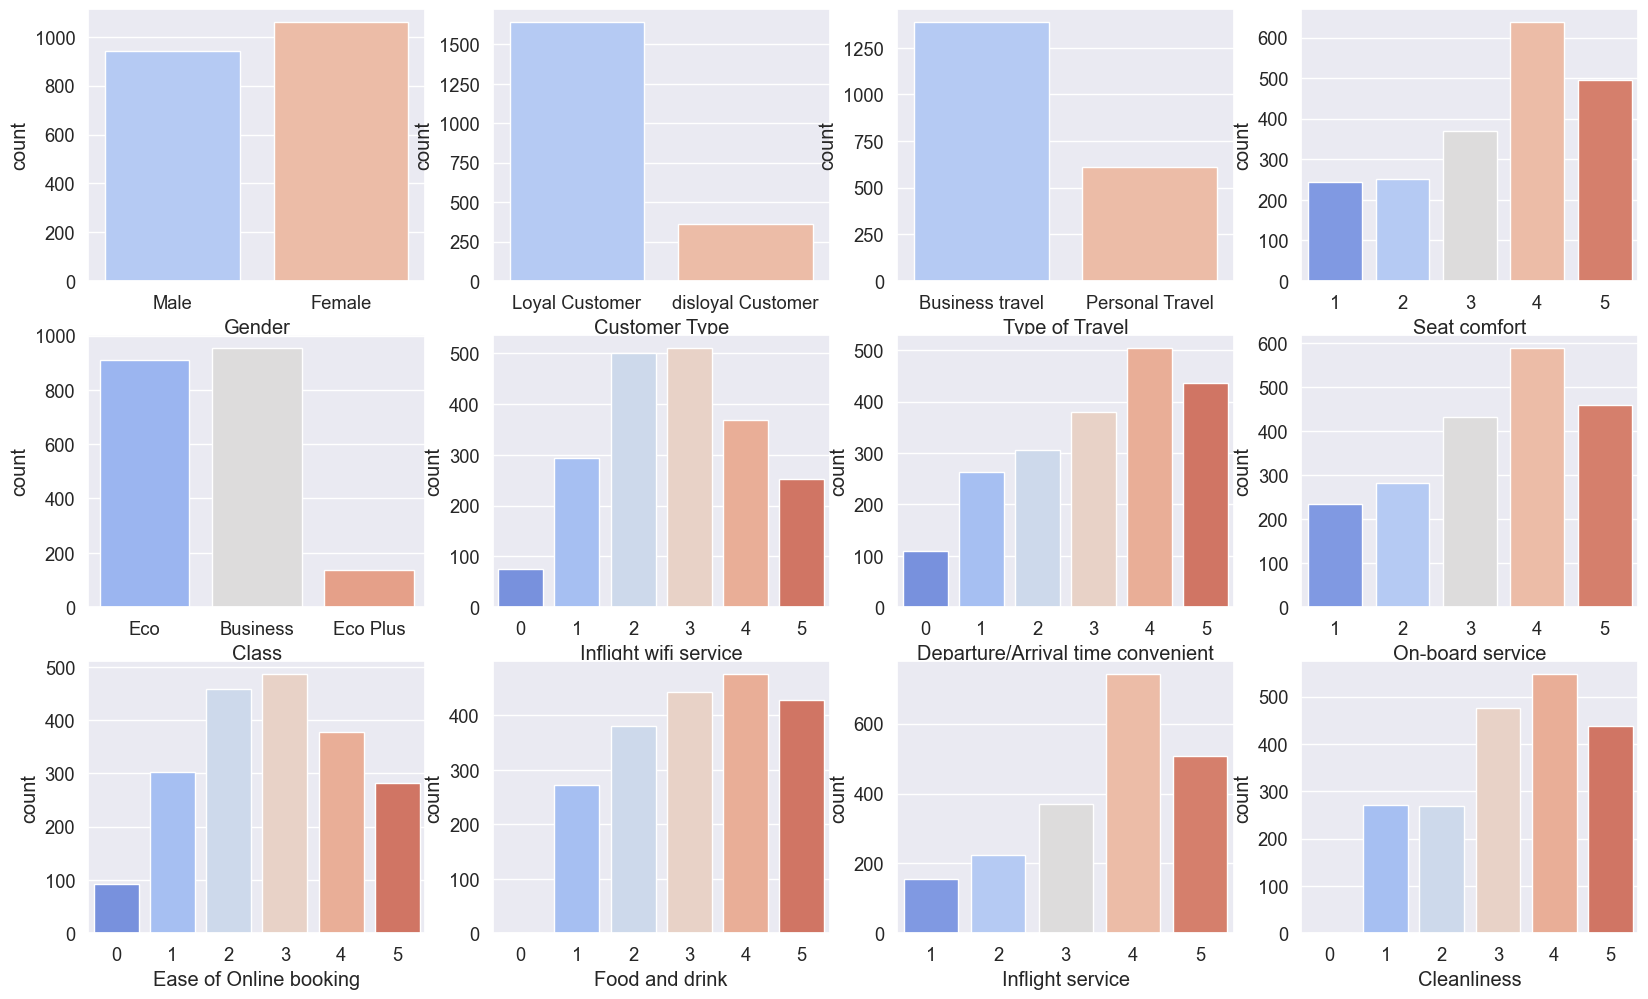

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (20, 12))
sns.countplot(x = 'Gender', data = sample_data, palette= 'coolwarm', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = sample_data, palette= 'coolwarm', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = sample_data, palette= 'coolwarm', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = sample_data, palette= 'coolwarm', ax = axes[0, 3]);
sns.countplot(x = 'Class', data = sample_data, palette= 'coolwarm', ax = axes[1, 0]);
sns.countplot(x = 'Inflight wifi service', data = sample_data, palette= 'coolwarm', ax = axes[1, 1]);
sns.countplot(x = 'Departure/Arrival time convenient', data = sample_data, palette= 'coolwarm', ax = axes[1, 2]);
sns.countplot(x = 'On-board service', data = sample_data, palette= 'coolwarm', ax = axes[1, 3]);
sns.countplot(x = 'Ease of Online booking', data = sample_data, palette= 'coolwarm', ax = axes[2, 0]);
sns.countplot(x = 'Food and drink', data = sample_data, palette= 'coolwarm', ax = axes[2, 1]);
sns.countplot(x = 'Inflight service', data = sample_data, palette= 'coolwarm', ax = axes[2, 2]);
sns.countplot(x = 'Cleanliness', data = sample_data, palette= 'coolwarm', ax = axes[2, 3]);

Food and Drink facilities have almost equal number of 2, 3, 4 and 5 ratings.
Wifi and Ease of Online Booking have recieved 2 out of 5 majority of the times

In [ ]:
import scikitplot

In [ ]:

numeric_data = train.select_dtypes(include=['int', 'float'])

# Calculer la matrice de corrélation
correlation_matrix = numeric_data.corr()

# Afficher la matrice de corrélation
print(correlation_matrix)


                                 Age  Flight Distance  \
Age                         1.000000  0.099461          
Flight Distance             0.099461  1.000000          
Departure Delay in Minutes -0.010152  0.002158          
Arrival Delay in Minutes   -0.012105 -0.002470          

                            Departure Delay in Minutes  \
Age                        -0.010152                     
Flight Distance             0.002158                     
Departure Delay in Minutes  1.000000                     
Arrival Delay in Minutes    0.960247                     

                            Arrival Delay in Minutes  
Age                        -0.012105                  
Flight Distance            -0.002470                  
Departure Delay in Minutes  0.960247                  
Arrival Delay in Minutes    1.000000                  


Departure Delay and Arrival delay are heavily correlated with each other, therefore one of them should be dropped

In [ ]:
train.drop('Arrival Delay in Minutes', axis=1, inplace= True)
test.drop('Arrival Delay in Minutes', axis=1, inplace= True)

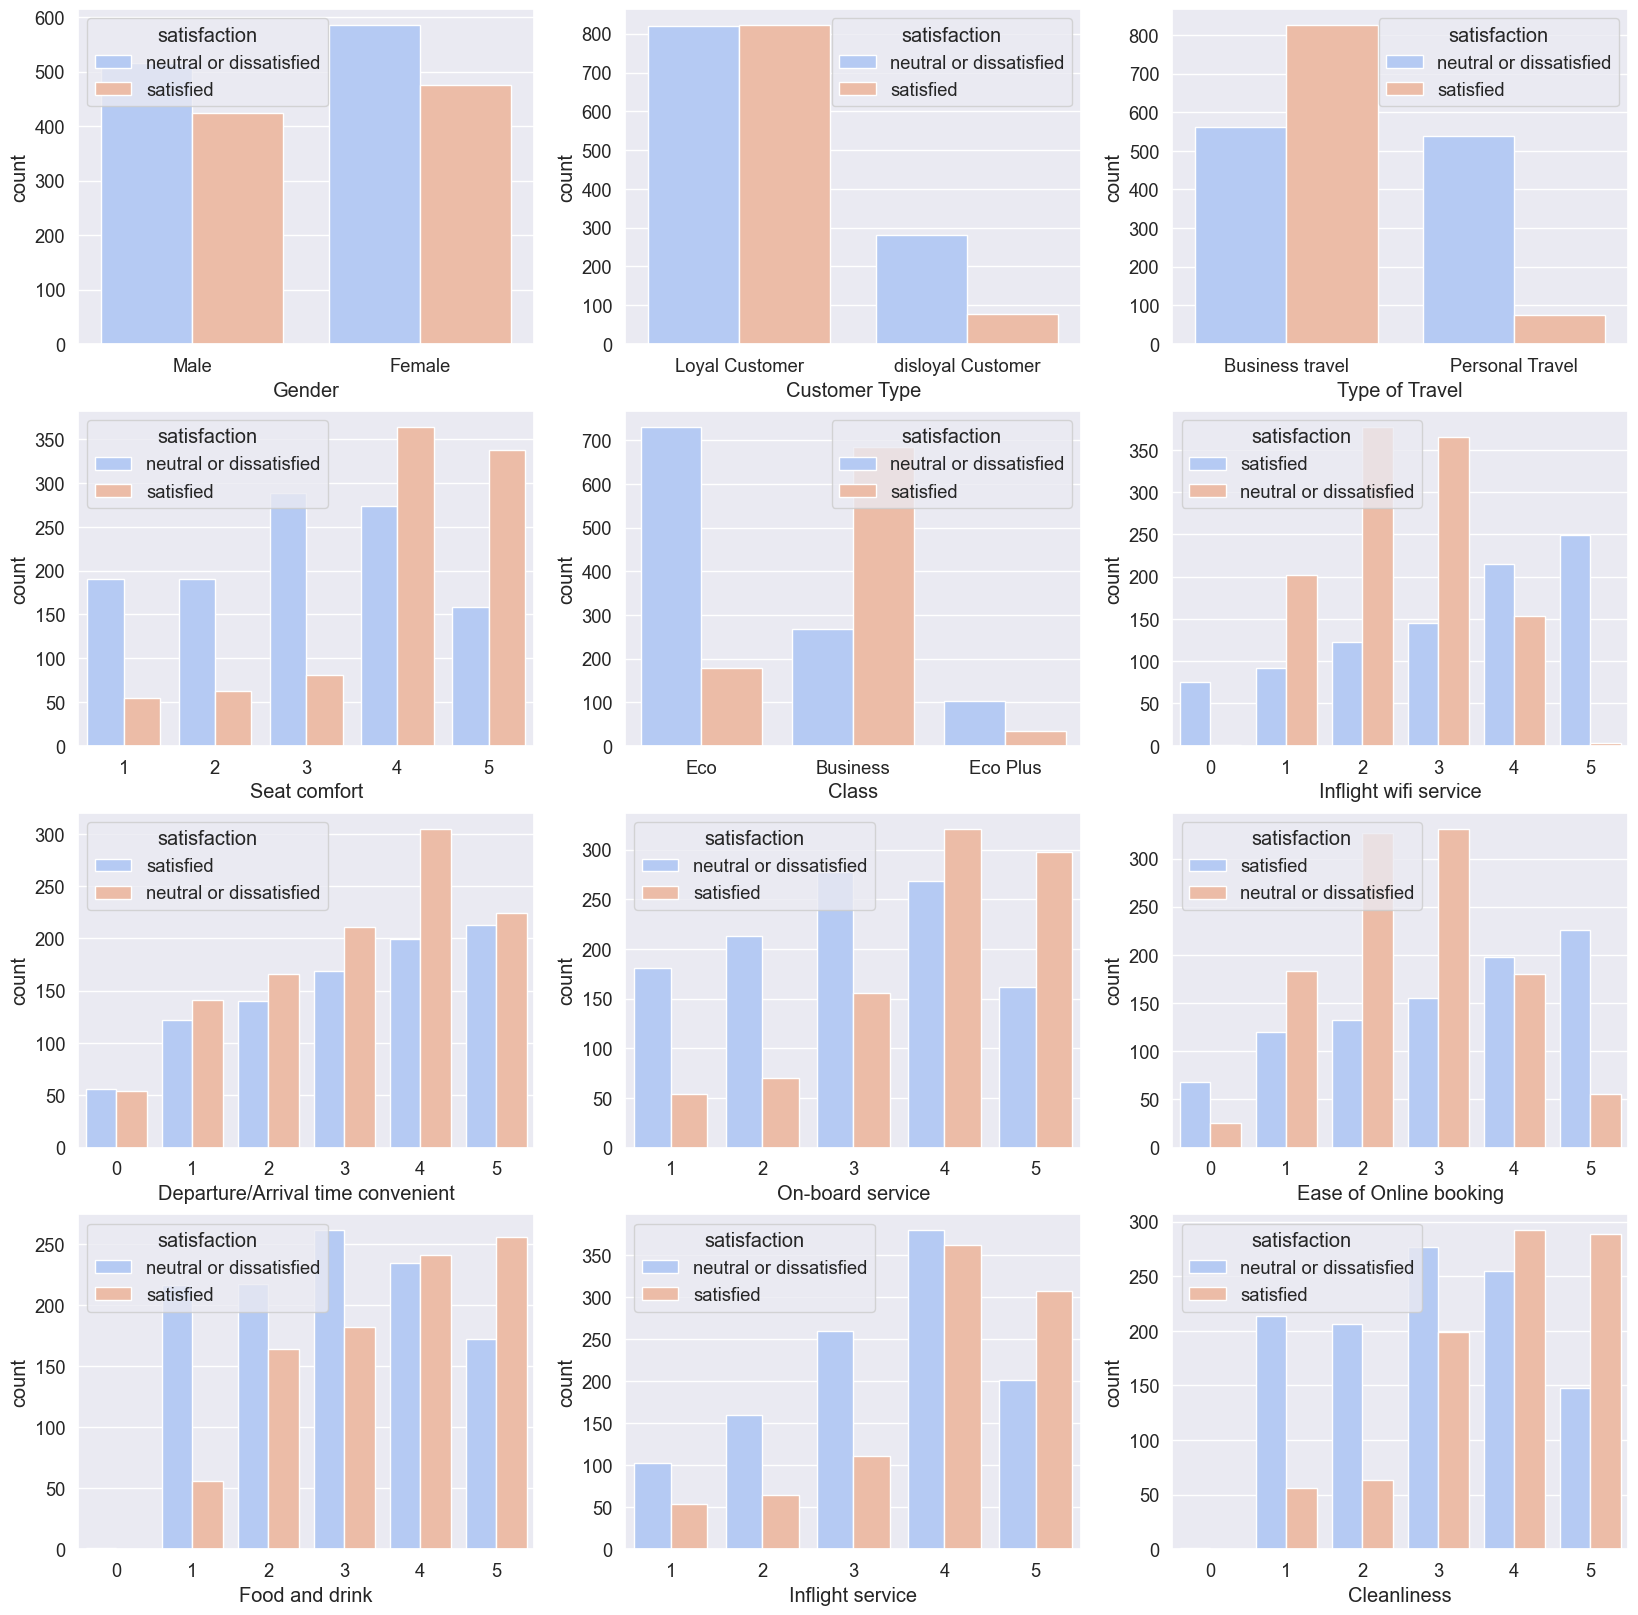

In [ ]:
fig, axes = plt.subplots(4, 3, figsize = (20, 20))
sns.countplot(x = 'Gender', data = sample_data, hue= 'satisfaction', palette= 'coolwarm', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = sample_data, hue= 'satisfaction',  palette= 'coolwarm', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = sample_data, hue= 'satisfaction',  palette= 'coolwarm', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = sample_data, hue= 'satisfaction',  palette= 'coolwarm', ax = axes[1, 0]);
sns.countplot(x = 'Class', data = sample_data, hue= 'satisfaction',  palette= 'coolwarm', ax = axes[1, 1]);
sns.countplot(x = 'Inflight wifi service', data = sample_data, hue= 'satisfaction',  palette= 'coolwarm', ax = axes[1, 2]);
sns.countplot(x = 'Departure/Arrival time convenient', data = sample_data, hue= 'satisfaction',  palette= 'coolwarm', ax = axes[2, 0]);
sns.countplot(x = 'On-board service', data = sample_data, hue= 'satisfaction',  palette= 'coolwarm', ax = axes[2, 1]);
sns.countplot(x = 'Ease of Online booking', data = sample_data, hue= 'satisfaction',  palette= 'coolwarm', ax = axes[2, 2]);
sns.countplot(x = 'Food and drink', data = sample_data, hue= 'satisfaction',  palette= 'coolwarm', ax = axes[3, 0]);
sns.countplot(x = 'Inflight service', data = sample_data, hue= 'satisfaction',  palette= 'coolwarm', ax = axes[3,  1]);
sns.countplot(x = 'Cleanliness', data = sample_data, hue= 'satisfaction',  palette= 'coolwarm', ax = axes[3, 2]);

People travelling for business are more satisfied as compared to people who are travelling for other purposes.
Business class people are more satisfied as compared to people travelling in eco class
Majority of people who gave 4 or 5 rating in any of the category were generally satisfied with the airline.

ENCODING


In [ ]:
train['Gender'] = train['Gender'].map({'Male' : 0, 'Female' : 1})
train['Customer Type'] = train['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
train['Type of Travel'] = train['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
train['Class'] = train['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
train['satisfaction'] = train['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})


test['Gender'] = test['Gender'].map({'Male' : 0, 'Female' : 1})
test['Customer Type'] = test['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
test['Type of Travel'] = test['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
test['Class'] = test['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
test['satisfaction'] = test['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

In [ ]:
train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,0,13,0,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,0
1,0,1,25,1,2,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,0
2,1,0,26,1,2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,1
3,1,0,25,1,2,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,0
4,0,0,61,1,2,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,1,23,1,0,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0
103900,0,0,49,1,2,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,1
103901,0,1,30,1,2,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,0
103902,1,1,22,1,0,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0


In [ ]:
train_filtered= train.loc[(train['Departure Delay in Minutes'] <= 30) & (train['Flight Distance'] <= 3800)]

Feature Scaling

In [ ]:
X_train = train.drop('satisfaction', axis = 1)
y_train = train.satisfaction

X_test = test.drop('satisfaction', axis=1)
y_test = test.satisfaction

STANDARIZATION

In [ ]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

NORMALISATION

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit the scaler to your data and transform it
X_train_n= scaler.fit_transform(X_train)
X_test_n= scaler.transform(X_test)

KNN

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


# Créer un classifieur KNN
knn = KNeighborsClassifier(n_neighbors=7)

# Effectuer une validation croisée (par exemple, avec une validation croisée à 5 plis)
scores = cross_val_score(knn, X_train, y_train, cv=10)

# Afficher les scores de validation croisée
print("Scores de validation croisée:", scores)

# Afficher la précision moyenne
print("Précision moyenne:", scores.mean())

Scores de validation croisée: [0.76441151 0.77374651 0.77547878 0.76113945 0.76698749 0.76275265
 0.77218479 0.76592878 0.77478345 0.77420597]
Précision moyenne: 0.7691619367059801


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


# Créer un classifieur KNN
knn = KNeighborsClassifier(n_neighbors=7)

# Effectuer une validation croisée (par exemple, avec une validation croisée à 5 plis)
scores = cross_val_score(knn, X_train_s, y_train, cv=10)

# Afficher les scores de validation croisée
print("Scores de validation croisée:", scores)

# Afficher la précision moyenne
print("Précision moyenne:", scores.mean())

Scores de validation croisée: [0.92791839 0.92762968 0.92541623 0.93061303 0.92897016 0.92492782
 0.93137632 0.926564   0.93060635 0.93262753]
Précision moyenne: 0.9286649511325645


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


# Créer un classifieur KNN
knn = KNeighborsClassifier(n_neighbors=7)

# Effectuer une validation croisée (par exemple, avec une validation croisée à 5 plis)
scores = cross_val_score(knn, X_train_n, y_train, cv=10)

# Afficher les scores de validation croisée
print("Scores de validation croisée:", scores)

# Afficher la précision moyenne
print("Précision moyenne:", scores.mean())

Scores de validation croisée: [0.92993937 0.93013184 0.92589741 0.92868829 0.9294514  0.92810395
 0.93108758 0.92694899 0.93262753 0.93407122]
Précision moyenne: 0.9296947578737764


Le cross validation pour differents K values

In [ ]:
# Définition des valeurs de k à tester
k_values = [1,3,5,9,11]

# Liste pour stocker les scores de validation croisée
cv_scores = []

# Validation croisée pour chaque valeur de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_s, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Recherche du meilleur paramètre k
best_k = k_values[cv_scores.index(max(cv_scores))]
print("Meilleur paramètre k trouvé par validation croisée :", best_k)

Meilleur paramètre k trouvé par validation croisée : 11


In [ ]:
# Entraînement du modèle avec le meilleur k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_n, y_train)

# Évaluation sur l'ensemble de test
test_accuracy = best_knn.score(X_test_n, y_test)
print("Précision sur l'ensemble de test avec le meilleur k :", test_accuracy)

Précision sur l'ensemble de test avec le meilleur k : 0.9304742839544194


In [ ]:
y_pred=best_knn.predict(X_test_s)

In [ ]:
# Entraînement du modèle avec le meilleur k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_s, y_train)

# Évaluation sur l'ensemble de test
test_accuracy = best_knn.score(X_test_s, y_test)
print("Précision sur l'ensemble de test avec le meilleur k :", test_accuracy)

Précision sur l'ensemble de test avec le meilleur k : 0.9303972898059747


In [ ]:
accuracy = best_knn.score(X_test_s,y_test)
print("Précision sur l'ensemble de test :", accuracy)

Précision sur l'ensemble de test : 0.9303972898059747


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
print("Matrice de confusion :\n", conf_matrix)

Matrice de confusion :
 [[11721  2852]
 [ 3289  8114]]


 curve validation

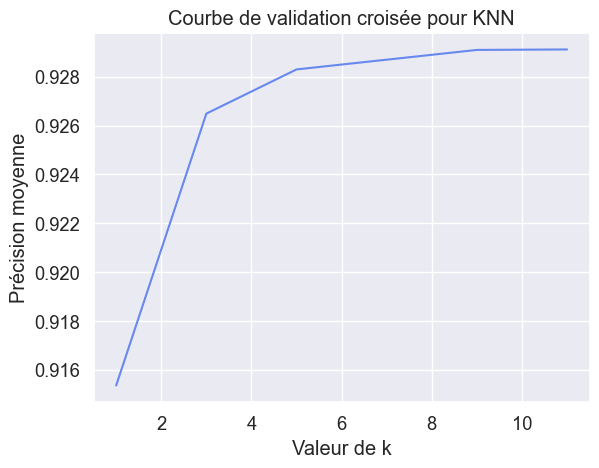

In [ ]:
# Tracé de la courbe de validation croisée
plt.plot(k_values, cv_scores)
plt.xlabel('Valeur de k')
plt.ylabel('Précision moyenne')
plt.title('Courbe de validation croisée pour KNN')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à tester
param_grid = {
    'metric': ['euclidean', 'manhattan'],  # Métriques de distance à tester
    'weights': ['uniform', 'distance'],    # Poids des voisins à tester
    'algorithm': ['auto'],                  # Algorithme utilisé pour calculer les voisins
    'n_neighbors': [5,9],               # Nombre de voisins à tester
}

# Créer un objet GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Effectuer la recherche sur l'ensemble d'entraînement
grid_search.fit(X_train_s,y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés par GridSearchCV :", grid_search.best_params_)

# Obtenir le meilleur modèle
best_knn_grid = grid_search.best_estimator_

# Évaluation sur l'ensemble de test avec le meilleur modèle
test_accuracy_grid = best_knn_grid.score(X_test_s, y_test)
print("Précision sur l'ensemble de test avec le meilleur modèle :", test_accuracy_grid)

Meilleurs paramètres trouvés par GridSearchCV : {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Précision sur l'ensemble de test avec le meilleur modèle : 0.9404450261780105


In [ ]:
# Définir les hyperparamètres
hyperparameters = {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

# Créer un modèle KNN avec les hyperparamètres spécifiés
best_knn_grid = KNeighborsClassifier(**hyperparameters)

# Entraîner le modèle sur l'ensemble d'entraînement
best_knn_grid.fit(X_train_s, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = best_knn_grid.predict(X_test_s)

# Évaluer la précision du modèle
accuracy = best_knn_grid.score(X_test_s, y_test)
print("Précision sur l'ensemble de test :", accuracy)

Précision sur l'ensemble de test : 0.9404450261780105


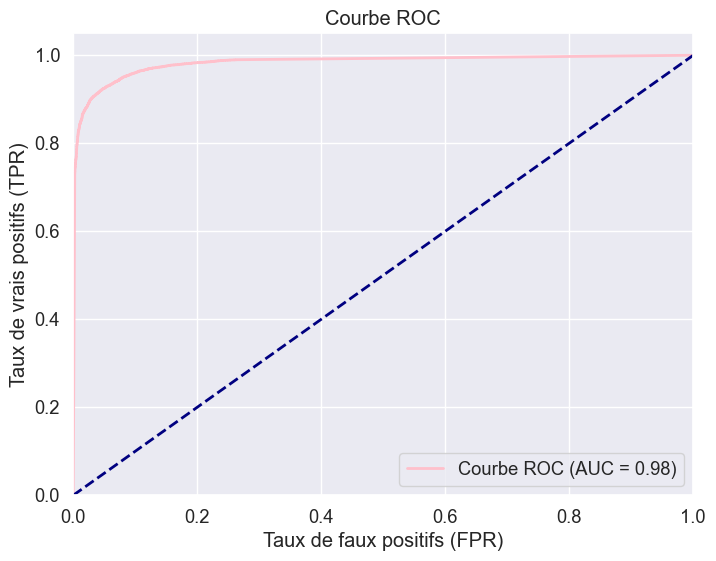

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculer les probabilités de prédiction pour chaque classe
probas_pred = best_knn_grid.predict_proba(X_test_s)

# Calculer le taux de faux positifs, le taux de vrais positifs et le seuil
fpr, tpr, thresholds = roc_curve(y_test, probas_pred[:, 1])  # probabilité de la classe positive

# Calculer l'aire sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='pink', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()